<b>United States COVID-19 Cases and Deaths by State

Date generated: Sat Oct 31 2020 17:39:10 GMT-0700 (Pacific Daylight Time)

In [4]:
import pandas as pd, datetime as dt, seaborn as sea, matplotlib.pyplot as plt

In [5]:
# Must have data downloaded from the CDC website
cspud = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data.csv", 
              dtype={"cdc_report_dt": "string", "pos_spec_dt": "string","onset_dt": "string",
                     "current_status": "string","sex": "string","age_group": "string",
                     "Race and ethnicity '('combined)": "string","hosp_yn": "string","icu_yn": "string",
                     "death_yn": "string","medcond_yn": "string"})

In [6]:
cspud.head(3)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/16,2021/01/16,<NA>,<NA>,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
1,2021/01/05,2021/02/10,<NA>,2021/01/05,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
2,2021/10/03,2021/10/04,2021/10/03,<NA>,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing


In [7]:
cspud.tail(3)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
44083360,2021/10/21,2021/10/26,2021/10/21,<NA>,Laboratory-confirmed case,Unknown,70 - 79 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing
44083361,2020/07/06,2020/10/21,<NA>,2020/07/06,Laboratory-confirmed case,Unknown,70 - 79 Years,"Multiple/Other, Non-Hispanic",Yes,Missing,No,Missing
44083362,2020/11/04,2021/12/06,2020/11/04,2020/11/04,Laboratory-confirmed case,Unknown,70 - 79 Years,"Multiple/Other, Non-Hispanic",Unknown,Unknown,Unknown,Unknown


In [8]:
invalidAgeEntry = 0
for nas, csa in zip(cspud['age_group'].isna(), cspud['age_group']):
    if(nas):
        invalidAgeEntry +=1

print(str(invalidAgeEntry) + " invalid age entries total")

82 invalid age entries total


In [9]:
print("Total Accounted People by Age Group\n")

ageGroup = cspud['age_group']
covidStatus = cspud['current_status']
deathStatus = cspud['death_yn']
ageGroupNA = ageGroup.isna()

ageGroups = ["0 - 9 Years", "10 - 19 Years", "20 - 29 Years", "30 - 39 Years", "40 - 49 Years", "50 - 59 Years", "60 - 69 Years", "70 - 79 Years", "80+ Years", "Missing", "NA"]

byAge = [0] * len(ageGroups)

for ard, ardna in zip(ageGroup, ageGroupNA):
    if(ardna == False):
        for ag in ageGroups:
            if(ard == ag):
                byAge[ageGroups.index(ag)] +=1
    else:
        byAge[10] +=1

totalByAge = sum(byAge)

# Print the total # of recorded people by age group
for ags, dba in zip(ageGroups, byAge):
    print(ags, ':', dba, ' Percentage:', round((dba/totalByAge)*100, 2), '%')

print ('\nTotal Recorded People: ', totalByAge)

Total Accounted People by Age Group

0 - 9 Years : 2925223  Percentage: 6.64 %
10 - 19 Years : 5505840  Percentage: 12.49 %
20 - 29 Years : 7964992  Percentage: 18.07 %
30 - 39 Years : 7320239  Percentage: 16.61 %
40 - 49 Years : 6297134  Percentage: 14.28 %
50 - 59 Years : 5861767  Percentage: 13.3 %
60 - 69 Years : 4140542  Percentage: 9.39 %
70 - 79 Years : 2229017  Percentage: 5.06 %
80+ Years : 1438832  Percentage: 3.26 %
Missing : 399695  Percentage: 0.91 %
NA : 82  Percentage: 0.0 %

Total Recorded People:  44083363


In [10]:
print("Total Laboratory-Confirmed Cases by Age Group\n")

casesByAge = [0] * len(ageGroups)

for ard, ardna, cs in zip(ageGroup, ageGroupNA, covidStatus):
    if(ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                casesByAge[ageGroups.index(ag)] +=1

totalCasesByAge = sum(casesByAge)

for ags, dba in zip(ageGroups, casesByAge):
    print(ags, ':', dba, '  Percentage: ', round((dba/totalCasesByAge)*100, 2), '%')

print('\nTotal Laboratory-Confirmed Cases:', totalCasesByAge)
print(round((totalCasesByAge/totalByAge)*100,2), '% Laboratory-Confirmed Cases out of', totalByAge)

Total Laboratory-Confirmed Cases by Age Group

0 - 9 Years : 2486364   Percentage:  6.52 %
10 - 19 Years : 4653282   Percentage:  12.2 %
20 - 29 Years : 6925378   Percentage:  18.16 %
30 - 39 Years : 6334453   Percentage:  16.61 %
40 - 49 Years : 5454925   Percentage:  14.3 %
50 - 59 Years : 5109134   Percentage:  13.4 %
60 - 69 Years : 3645482   Percentage:  9.56 %
70 - 79 Years : 1984821   Percentage:  5.2 %
80+ Years : 1286134   Percentage:  3.37 %
Missing : 255498   Percentage:  0.67 %
NA : 0   Percentage:  0.0 %

Total Laboratory-Confirmed Cases: 38135471
86.51 % Laboratory-Confirmed Cases out of 44083363


In [11]:
print("Total Probable Cases by Age Group\n")

probableCasesByAge = [0] * len(ageGroups)

for ard, ardna, cs in zip(ageGroup, ageGroupNA, covidStatus):
    if(ardna == False and cs == 'Probable Case'):
        for ag in ageGroups:
            if(ard == ag):
                probableCasesByAge[ageGroups.index(ag)] +=1

totalProbableCasesByAge = sum(probableCasesByAge)

for ags, dba in zip(ageGroups, probableCasesByAge):
    print (ags, ':', dba, ' Percentage: ', round((dba/totalProbableCasesByAge)*100, 2), '%')

print ('\nTotal Probable Cases: ', totalProbableCasesByAge)
print(round((totalProbableCasesByAge/totalByAge)*100,2), '% Probable Cases out of', totalByAge)

Total Probable Cases by Age Group

0 - 9 Years : 438859  Percentage:  7.38 %
10 - 19 Years : 852558  Percentage:  14.33 %
20 - 29 Years : 1039614  Percentage:  17.48 %
30 - 39 Years : 985786  Percentage:  16.57 %
40 - 49 Years : 842209  Percentage:  14.16 %
50 - 59 Years : 752633  Percentage:  12.65 %
60 - 69 Years : 495060  Percentage:  8.32 %
70 - 79 Years : 244196  Percentage:  4.11 %
80+ Years : 152698  Percentage:  2.57 %
Missing : 144197  Percentage:  2.42 %
NA : 0  Percentage:  0.0 %

Total Probable Cases:  5947810
13.49 % Probable Cases out of 44083363


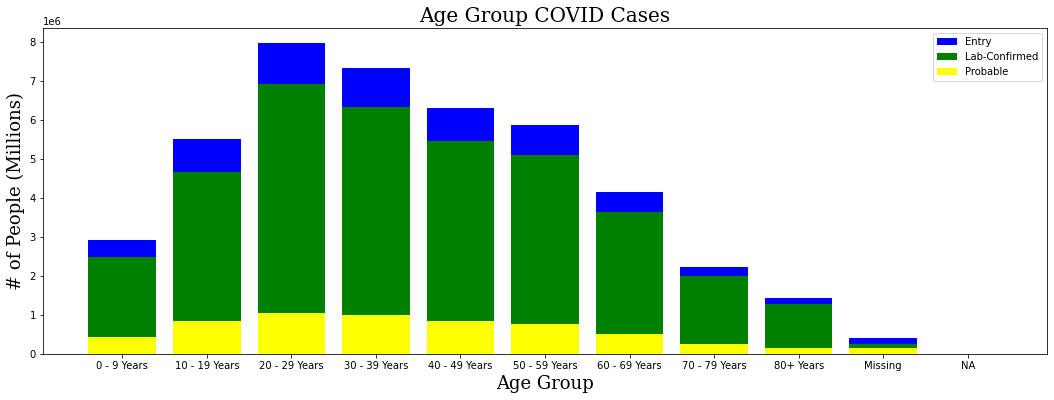

In [12]:
plt.figure(figsize=(18,6))
fontTitle = {'family':'serif','color':'Black','size':20}
fontLabel = {'family':'serif','color':'Black','size':18}

plt.title("Age Group COVID Cases", fontdict = fontTitle)
plt.xlabel("Age Group", fontdict = fontLabel)
plt.ylabel("# of People (Millions)", fontdict = fontLabel)

plt.bar(ageGroups, byAge, color='blue', label="Entry")                      # Entry
plt.bar(ageGroups, casesByAge, color='green', label="Lab-Confirmed")        # Lab-confirmed
plt.bar(ageGroups, probableCasesByAge, color='yellow', label="Probable")    # Probable
plt.legend()

plt.show()

In [13]:
##Tab up entries with that resulted in death by age group.
print("Total Death Cases by Age Group\n")
print("% is out of the total # of people in the age group\n")

deathsByAge = [0] * len(ageGroups)

for d, ard, ardna in zip(deathStatus, ageGroup, ageGroupNA):
    if(d == 'Yes' and ardna == False):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAge[ageGroups.index(ag)] +=1

totalDeathsByAge = sum(deathsByAge)

for ags, dba in zip(ageGroups, deathsByAge):
    print (ags, ':', dba, ' Percentage:', round((dba/totalDeathsByAge)*100,2), '%')

print('\nTotal Deaths:', totalDeathsByAge)
print(str(round((totalDeathsByAge/totalByAge)*100,2)) + "% of Deaths out of " + str(totalByAge) + " accounted people.")
print("Survival rate: " + str(100 - round((totalDeathsByAge/totalByAge)*100,2)) + "%")

Total Death Cases by Age Group

0 - 9 Years : 498  Percentage: 0.07 %
10 - 19 Years : 1016  Percentage: 0.14 %
20 - 29 Years : 4903  Percentage: 0.69 %
30 - 39 Years : 12436  Percentage: 1.75 %
40 - 49 Years : 28185  Percentage: 3.96 %
50 - 59 Years : 66483  Percentage: 9.33 %
60 - 69 Years : 128696  Percentage: 18.07 %
70 - 79 Years : 177971  Percentage: 24.98 %
80+ Years : 292042  Percentage: 41.0 %
Missing : 86  Percentage: 0.01 %
NA : 0  Percentage: 0.0 %

Total Deaths: 712316
1.62% of Deaths out of 44083363
Survival rate: 98.38%


In [14]:
print("Total Covid Deaths by Age Group\n")

covidDeathsByAge = [0] * len(ageGroups)

for d, ard, ardna, cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidDeathsByAge[ageGroups.index(ag)] +=1

totalCovidDeathsByAge = sum(covidDeathsByAge)

for ags, dba in zip(ageGroups, covidDeathsByAge):
    print (ags, ':', dba, ' Percentage: ', round((dba/totalCovidDeathsByAge)*100, 2), '%')

print('\nTotal Laboratory-Confirmed Covid Deaths:', totalCovidDeathsByAge)
print(str(round((totalCovidDeathsByAge/totalDeathsByAge)*100,2)) + "% of total Deaths from Covid")
print("So, realistically, " + str(round((totalCovidDeathsByAge/totalByAge)*100,2)) + "% out of " + str(totalByAge) + " died from Covid ")
print("Realistic Survival Rate: " + str(100 - round((totalCovidDeathsByAge/totalByAge)*100,2)) + "%")

Total Covid Deaths by Age Group

0 - 9 Years : 444  Percentage:  0.07 %
10 - 19 Years : 964  Percentage:  0.15 %
20 - 29 Years : 4548  Percentage:  0.71 %
30 - 39 Years : 11347  Percentage:  1.76 %
40 - 49 Years : 25619  Percentage:  3.98 %
50 - 59 Years : 60282  Percentage:  9.36 %
60 - 69 Years : 117207  Percentage:  18.19 %
70 - 79 Years : 161764  Percentage:  25.11 %
80+ Years : 262051  Percentage:  40.67 %
Missing : 46  Percentage:  0.01 %
NA : 0  Percentage:  0.0 %

Total Laboratory-Confirmed Covid Deaths: 644272
90.45% of total Deaths from Covid
So, realistically, 1.46% out of 44083363 died from Covid 
Realistic Survival Rate: 98.54%


In [46]:
##Tab up entries with the same mortality condition.
print("Comorbidities\n")
comorbidity = cspud['medcond_yn']
coMo, coMoDeath = 0, 0

for c,d in zip(comorbidity, deathStatus):
    if (c == 'Yes'):
        coMo +=1
    if (d == 'Yes' and c == 'Yes'):
        coMoDeath +=1

print('Total Comorbidity Cases:', coMo, '\nTotal Comorbidity Deaths:', coMoDeath)

Comorbidities

Total Comorbidity Cases: 1977721 
Total Comorbidity Deaths: 117079


In [47]:
print("Comorbidity Deaths\n")
deathsByAgeCoMo = [0] * len(ageGroups)

for c,d,ard,ardna,cs in zip(comorbidity, deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and c == "Yes" and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAgeCoMo[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups, deathsByAgeCoMo):
    print(ags, ':', dba, ' Percentage: ', round((dba/totalCovidDeathsByAge)*100, 2), '%')

coMoDeaths = sum(deathsByAgeCoMo)
coMoDeathRatio = coMoDeaths / totalCovidDeathsByAge

print("Comorbidity Deaths: " + str(coMoDeaths) + "\nComorbidity Death Percentage: " + str(round(coMoDeathRatio*100, 2)) + "%")

Comorbidity Deaths

0 - 9 Years : 34
10 - 19 Years : 80
20 - 29 Years : 409
30 - 39 Years : 1356
40 - 49 Years : 3365
50 - 59 Years : 9128
60 - 69 Years : 19936
70 - 79 Years : 28694
80+ Years : 44310
Missing : 3
NA : 0
Comorbidity Deaths: 107315
Comorbidity Death Percentage: 16.66%


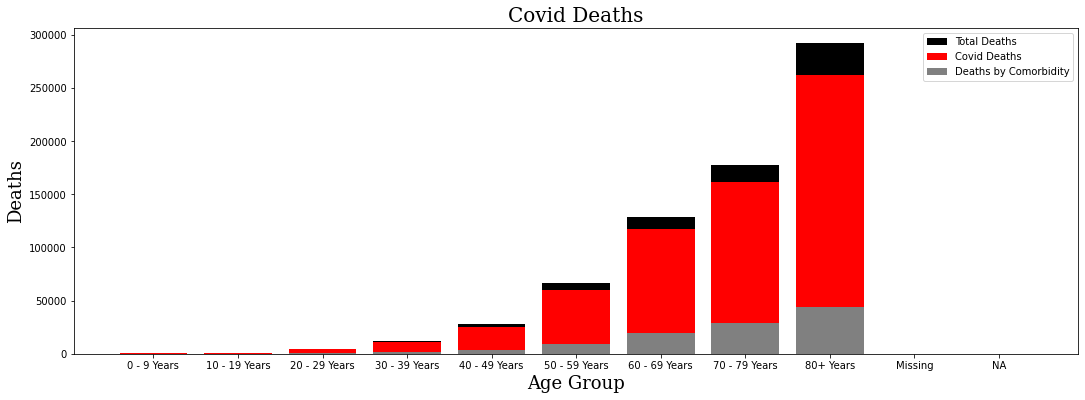

In [17]:
plt.figure(figsize=(18,6))
fontTitle = {'family':'serif', 'color':'Black', 'size':20}
fontLabel = {'family':'serif', 'color':'Black', 'size':18}

plt.title("Covid Deaths", fontdict = fontTitle)
plt.xlabel('Age Group', fontdict = fontLabel)
plt.ylabel('Deaths', fontdict = fontLabel)

plt.bar(ageGroups, deathsByAge, color='black', label="Total Deaths")
plt.bar(ageGroups, covidDeathsByAge, color='red', label="Covid Deaths")
plt.bar(ageGroups, deathsByAgeCoMo, color='gray', label="Deaths by Comorbidity")
plt.legend()

plt.show()

In [18]:
print("Total Covid Survival\n")

covidSurvivalByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'No' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidSurvivalByAge[ageGroups.index(ag)] +=1

totalCovidSurvivalByAge = sum(covidSurvivalByAge)

for ags, dba in zip(ageGroups,covidSurvivalByAge):
    print(ags, ':', dba, '  Percentage: ', round((dba/totalCovidSurvivalByAge)*100, 2), '%')

print ('\nTotal Covid Survival: ', totalCovidSurvivalByAge)

Total Covid Survival

0 - 9 Years : 971515   Percentage:  6.88 %
10 - 19 Years : 1836934   Percentage:  13.01 %
20 - 29 Years : 2489596   Percentage:  17.63 %
30 - 39 Years : 2280201   Percentage:  16.14 %
40 - 49 Years : 2025727   Percentage:  14.34 %
50 - 59 Years : 1941042   Percentage:  13.74 %
60 - 69 Years : 1402393   Percentage:  9.93 %
70 - 79 Years : 749551   Percentage:  5.31 %
80+ Years : 422618   Percentage:  2.99 %
Missing : 3886   Percentage:  0.03 %
NA : 0   Percentage:  0.0 %

Total Covid Survival:  14123463


In [19]:
print("Covid Fatality Rate by Age\n")

covidFatalityRateByAge = [0] * len(ageGroups)

for cs,cd in zip(covidSurvivalByAge, covidDeathsByAge):
    if(cs == 0):    covidFatalityRateByAge[covidSurvivalByAge.index(cs)] = 0
    else:           covidFatalityRateByAge[covidSurvivalByAge.index(cs)] = (cd/cs)

for ags, dba in zip(ageGroups,covidFatalityRateByAge):
    print(ags, ':', round(dba, 4)*100, '%')

Covid Fatality Rate by Age

0 - 9 Years : 0.05 %
10 - 19 Years : 0.05 %
20 - 29 Years : 0.18 %
30 - 39 Years : 0.5 %
40 - 49 Years : 1.26 %
50 - 59 Years : 3.11 %
60 - 69 Years : 8.36 %
70 - 79 Years : 21.58 %
80+ Years : 62.01 %
Missing : 1.18 %
NA : 0 %


In [20]:
covidNONCoMoFatalityByAge = [0] * len(ageGroups)

for cd,cmd in zip(covidDeathsByAge, deathsByAgeCoMo):
    covidNONCoMoFatalityByAge[covidDeathsByAge.index(cd)] = cd-cmd
    
for ags,dba in zip(ageGroups,covidNONCoMoFatalityByAge):
    print (ags, ':', dba) 

0 - 9 Years : 410
10 - 19 Years : 884
20 - 29 Years : 4139
30 - 39 Years : 9991
40 - 49 Years : 22254
50 - 59 Years : 51154
60 - 69 Years : 97271
70 - 79 Years : 133070
80+ Years : 217741
Missing : 43
NA : 0


In [21]:
covidNONCoMoFatalityRateByAge = [0] * len(ageGroups)

for cs,cd in zip(covidSurvivalByAge, covidNONCoMoFatalityByAge):
    if(cs == 0):    covidNONCoMoFatalityRateByAge[covidSurvivalByAge.index(cs)] = 0
    else:           covidNONCoMoFatalityRateByAge[covidSurvivalByAge.index(cs)] = (cd/cs)
    
for ags,dba in zip(ageGroups,covidNONCoMoFatalityRateByAge):
    print (ags, ':', dba)

0 - 9 Years : 0.00042202127604823393
10 - 19 Years : 0.00048123666936318886
20 - 29 Years : 0.0016625187379799775
30 - 39 Years : 0.004381631268471508
40 - 49 Years : 0.010985685632861683
50 - 59 Years : 0.026353886211632722
60 - 69 Years : 0.06936072841207849
70 - 79 Years : 0.17753294972590258
80+ Years : 0.5152194180086982
Missing : 0.011065362840967576
NA : 0


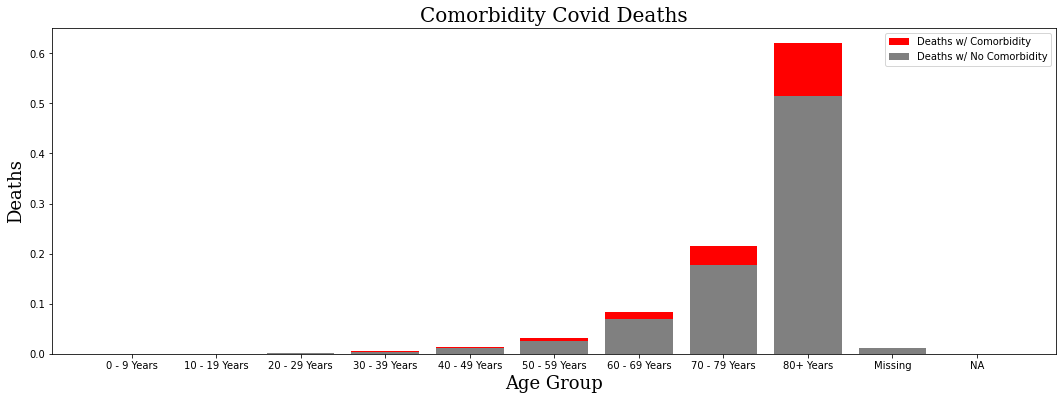

In [22]:
plt.figure(figsize=(18,6))
fontTitle = {'family':'serif','color':'Black','size':20}
fontLabel = {'family':'serif','color':'Black','size':18}

plt.title("Comorbidity Covid Deaths", fontdict = fontTitle)
plt.xlabel('Age Group', fontdict = fontLabel)
plt.ylabel('Deaths', fontdict = fontLabel)

plt.bar(ageGroups, covidFatalityRateByAge, color='red', label="Deaths w/ Comorbidity")                # Deaths w/ Comorbidity
plt.bar(ageGroups, covidNONCoMoFatalityRateByAge, color='gray', label="Deaths w/ No Comorbidity")     # Deaths w/ NO Comorbidity
plt.legend()

plt.show()

In [23]:
##Tab up entries with the same mortality condition.

deaths, unknown, lived, missing = 0, 0, 0, 0

for d in deathStatus:
    if(d == 'Yes'):
        deaths +=1
    if(d == 'No'):
        lived +=1
    if(d == 'Unknown'):
        unknown +=1
    if(d == 'Missing'):
        missing +=1

total = deaths + missing + unknown + lived
        
print('Deaths  : ', deaths, '\nLived   : ', lived, '\nUnknown : ', unknown, '\nMissing : ', missing, '\n\nTotal   : ', total)

Deaths  :  712316 
Lived   :  16481876 
Unknown :  6211933 
Missing :  20677238 

Total   :  44083363


In [24]:
mortalityRatio = deaths/ lived 

additionalMissingDeaths = int(mortalityRatio * missing)
additionalUnknownDeaths = int(mortalityRatio * unknown)

print('Mortality Ratio: ', mortalityRatio, '\nDeaths adjusted for mortality ratio: ', additionalMissingDeaths + additionalUnknownDeaths + deaths)

Mortality Ratio:  0.04321813851772699 
Deaths adjusted for mortality ratio:  1874415


In [32]:
print("Total Unknown Death Status by Age\n")

covidUnknownByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Unknown' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidUnknownByAge[ageGroups.index(ag)] +=1

totalCovidUnknownByAge = sum(covidUnknownByAge)

for ags,dba in zip(ageGroups,covidUnknownByAge):
    print (ags, ':', dba, ', Percentage: ', round((dba/totalCovidUnknownByAge)*100,2), '%')

print ('\nTotal Death Status Unknown: ', totalCovidUnknownByAge)

Total Unknown Death Status by Age

0 - 9 Years : 289385 , Percentage:  5.45 %
10 - 19 Years : 614906 , Percentage:  11.59 %
20 - 29 Years : 968531 , Percentage:  18.25 %
30 - 39 Years : 879091 , Percentage:  16.57 %
40 - 49 Years : 777354 , Percentage:  14.65 %
50 - 59 Years : 760530 , Percentage:  14.33 %
60 - 69 Years : 549734 , Percentage:  10.36 %
70 - 79 Years : 287755 , Percentage:  5.42 %
80+ Years : 176071 , Percentage:  3.32 %
Missing : 2563 , Percentage:  0.05 %
NA : 0 , Percentage:  0.0 %

Total Death Status Unknown:  5305920


In [26]:
print("Total Additional Unknown Deaths Status by Age\n")
covidAdditionalUnknownDeathsByAge = [0] * len(ageGroups)

for ags,dba,cfr in zip(ageGroups, covidUnknownByAge, covidFatalityRateByAge):
    covidAdditionalUnknownDeathsByAge[covidFatalityRateByAge.index(cfr)] = int(dba*cfr)
    print (ags, ':', int(dba*cfr))
    
totalCovidAdditionalUnknownByAge = sum(covidAdditionalUnknownDeathsByAge)

print ('\nTotal Additional Death Status Unknown: ', totalCovidAdditionalUnknownByAge)

Total Additional Unknown Deaths Status by Age

0 - 9 Years : 132
10 - 19 Years : 322
20 - 29 Years : 1769
30 - 39 Years : 4374
40 - 49 Years : 9831
50 - 59 Years : 23619
60 - 69 Years : 45944
70 - 79 Years : 62101
80+ Years : 109175
Missing : 30
NA : 0

Total Additional Death Status Unknown:  257297


In [27]:
print("Total Missing Deaths by Age\n")

covidMissingByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Missing' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidMissingByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidMissingByAge):
    print (ags, ':', dba)

totalCovidMissingByAge = sum(covidMissingByAge)

print ('\nTotal Death Status Missing: ', totalCovidMissingByAge)

Total Missing Deaths by Age

0 - 9 Years : 1225020
10 - 19 Years : 2200478
20 - 29 Years : 3462703
30 - 39 Years : 3163814
40 - 49 Years : 2626225
50 - 59 Years : 2347280
60 - 69 Years : 1576148
70 - 79 Years : 785751
80+ Years : 425394
Missing : 249003
NA : 0

Total Death Status Missing:  18061816


In [33]:
print("Total Additional Missing Death Status\n")

covidAdditionalMissingDeathsByAge = [0] * len(ageGroups)

for ags,dba,cfr in zip(ageGroups, covidMissingByAge, covidFatalityRateByAge):
    covidAdditionalMissingDeathsByAge[covidFatalityRateByAge.index(cfr)] = int(dba*cfr)
    print (ags, ':', int(dba*cfr))
    
totalCovidAdditionalMissingByAge = sum(covidAdditionalMissingDeathsByAge)

print ('\nTotal Additional Missing Death Status: ', totalCovidAdditionalMissingByAge)

Total Additional Missing Death Status

0 - 9 Years : 559
10 - 19 Years : 1154
20 - 29 Years : 6325
30 - 39 Years : 15744
40 - 49 Years : 33213
50 - 59 Years : 72898
60 - 69 Years : 131728
70 - 79 Years : 169576
80+ Years : 263772
Missing : 2947
NA : 0

Total Additional Missing Death Status:  697916


In [34]:
totalCovidAdditionalMissingByAge + totalCovidMissingByAge + totalCovidDeathsByAge

print("Total Covid Additional Missing by Age: " + str(totalCovidAdditionalMissingByAge))

Total Covid Additional Missing by Age: 697916


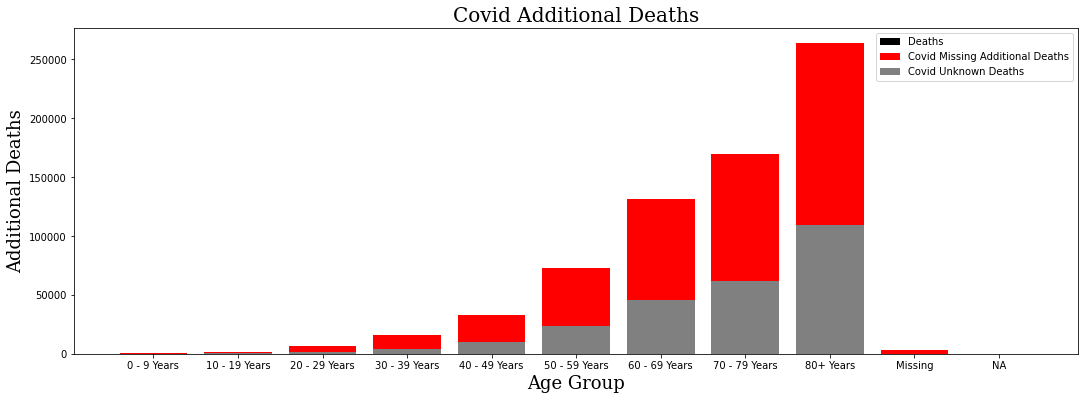

In [39]:
plt.figure(figsize=(18,6))
fontTitle = {'family':'serif','color':'Black','size':20}
fontLabel = {'family':'serif','color':'Black','size':18}

plt.title("Covid Additional Deaths", fontdict=fontTitle)
plt.xlabel('Age Group', fontdict=fontLabel)
plt.ylabel('Additional Deaths', fontdict=fontLabel)

plt.bar(ageGroups, covidDeathsByAge, color='black', label="Deaths")
plt.bar(ageGroups, covidAdditionalMissingDeathsByAge, color='red', label="Covid Missing Additional Deaths")
plt.bar(ageGroups, covidAdditionalUnknownDeathsByAge, color='gray', label="Covid Unknown Deaths")
plt.legend()

plt.show()

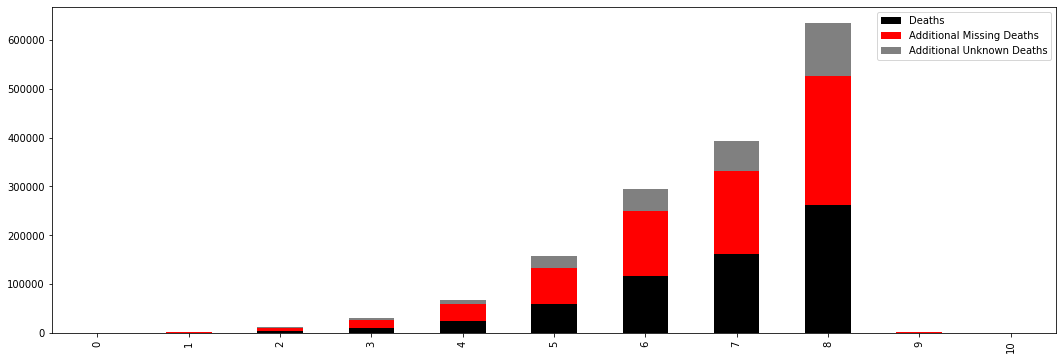

In [41]:
#plt.figure(figsize=(18,6))
#fontTitle = {'family':'serif','color':'Black','size':20}
#fontLabel = {'family':'serif','color':'Black','size':18}
#
#plt.title("Deaths", fontdict=fontTitle)
#plt.xlabel("Age Group", fontdict=fontLabel)
#plt.ylabel
#
#plt.bar(ageGroups, covidDeathsByAge, color='black', label="Deaths")
#plt.bar(ageGroups, covidAdditionalMissingDeathsByAge, color='red', label="Missing Additional Deaths")
#plt.bar(ageGroups, covidAdditionalUnknownDeathsByAge, color='gray', label="Covid Unknown Deaths")
#plt.legend()
#
#plt.show()

deathFrame=pd.DataFrame(zip(ageGroups, covidDeathsByAge, covidAdditionalMissingDeathsByAge, covidAdditionalUnknownDeathsByAge))

colors = ['black', 'red', 'gray']
lgn = ['Deaths', 'Additional Missing Deaths', 'Additional Unknown Deaths']

ax = deathFrame.plot(kind='bar', stacked=True, color=colors, figsize=(18,6))

ax.legend(lgn)

In [36]:
print ('Additional:', int(totalCovidAdditionalMissingByAge + totalCovidAdditionalUnknownByAge))
print ('Total with Additional:', int(totalCovidAdditionalMissingByAge + totalCovidAdditionalUnknownByAge + totalCovidDeathsByAge))

Additional: 955213
Total with Additional: 1599485


In [44]:
initialReportDate = cspud['cdc_report_dt']

initialReportDatetime = [dt.datetime.strptime(x, "%Y/%m/%d") for x in initialReportDate]

TypeError: strptime() argument 1 must be str, not NAType

In [188]:
covidDeathIRD, covidDeathIRDAG = [], []

initialReportDatetime.sort()

for d,ird,ag,agna,cs in zip(deathStatus, initialReportDatetime, ageGroup, ageGroupNA, covidStatus):
    if (d == 'Yes' and cs == 'Laboratory-confirmed case' and agna == False):
        covidDeathIRD.append(ird)
        covidDeathIRDAG.append(ag)

In [173]:
covidDeathDailyTotalIRD, covidDeathDailyIRD = [], []

tempIRD = None
dailyIRD = 0

for cdird in covidDeathIRD:
    if(tempIRD == None):
        tempIRD = cdird
        dailyIRD = 1
    elif(tempIRD == cdird):
        dailyIRD += 1
    elif(tempIRD != cdird):
        covidDeathDailyIRD.append(cdird)
        covidDeathDailyTotalIRD.append(dailyIRD)
        dailyIRD = 1
        tempIRD = cdird

In [174]:
sum(covidDeathDailyTotalIRD)

0

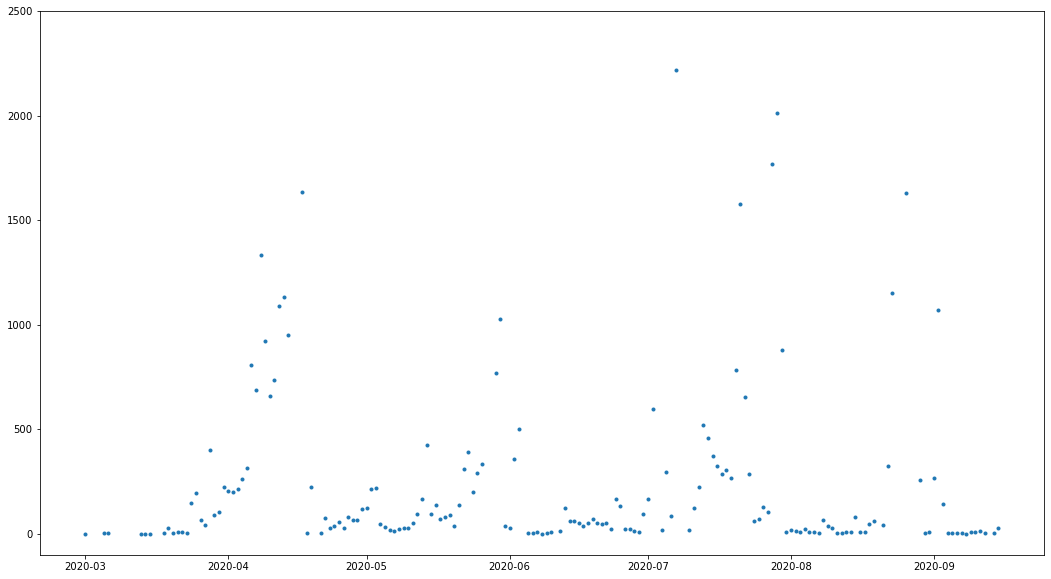

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(covidDeathDailyIRD, covidDeathDailyTotalIRD, marker='.')
plt.ylim(-100,2500)
plt.show()

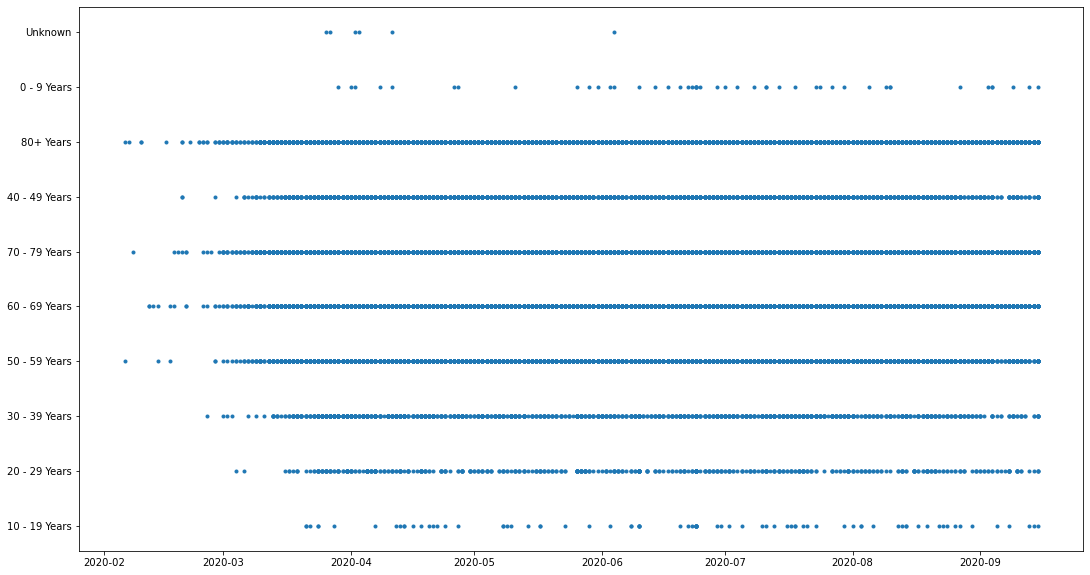

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(covidDeathIRD, covidDeathIRDAG, marker='.')
plt.show()

In [ ]:
cdbsot = pd.read_csv("~/Downloads/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

cdbsot.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [ ]:
reportedNewDeaths = cdbsot['new_death']

reportedTotalDeaths = sum(reportedNewDeaths)

reportedTotalDeaths

229109

In [ ]:
deathTotalDifference = reportedTotalDeaths - deaths

deathByAgeTotalDifference = reportedTotalDeaths - totalDeathsByAge

print(deathTotalDifference, deathByAgeTotalDifference)

92701 92709


In [ ]:
cdbs = pd.read_csv("~/Downloads/united_states_covid19_cases_and_deaths_by_state.csv")

cdbs.head()

,State/Territory,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,Alaska,14837,NaN,NaN,2719,2012,81,NaN,NaN,13,10,52.7,0.3
1,Alabama,190496,162720.0,27776.0,9580,3897,2932,2735.0,197.0,73,59,28.0,0.2
2,Arkansas,110874,NaN,NaN,6739,3679,1900,NaN,NaN,118,63,31.9,0.6
3,American Samoa,0,NaN,NaN,0,0,0,NaN,NaN,0,0,0.0,0.0
4,Arizona,244045,238356.0,5689.0,8163,3403,5934,5641.0,293.0,69,82,16.3,0.1


In [ ]:
reportedStateDeaths = cdbs['Total Deaths']

reportedStateTotalDeaths = sum(reportedStateDeaths)

reportedStateTotalDeaths

229109

In [ ]:
populationData = pd.read_csv('nst-est2019-alldata.csv')

In [ ]:
populationData.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


7/1/2019 resident total population estimate

In [ ]:
populationData['NAME'][0]

'United States'

In [ ]:
population2019 = populationData['POPESTIMATE2019']

In [ ]:
population2019[0]

328239523

<b>Citation</b>

-<i>Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations (version date: September 30, 2020).